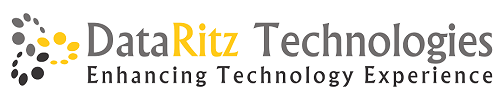

# Topics to be covered

* Introduction to DataFrames
* Creating a Pandas Dataframe
* Data Selection in DataFrame
* Working with Missing Values

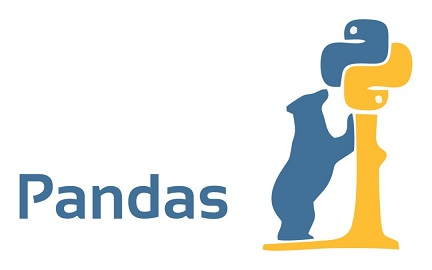

####  A DataFrame, is often used for analytical purposes and is betterunderstood when thought of as column oriented, where each column is a Series.

> * #### Pandas DataFrame is the Data Structure, which is a 2 dimensional Array. 
* #### You can say that multiple Pandas Series make a Pandas DataFrame.
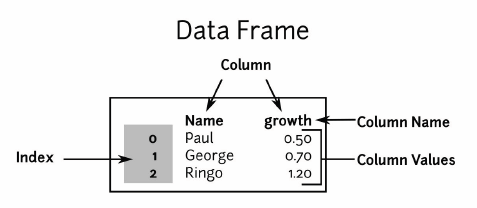

# Import the  Package

In [1]:
import pandas as pd
import numpy as np

# Creating Pandas DataFrame from the dictionary

In [6]:
# Dictionary
data={'student': ['Jack','Mike','Rohan','Zubair'], 'year':[1,2,3,1], 'marks':[9.8,6.7,8,9.9]}

In [8]:
df = pd.DataFrame(data)
df

,student,year,marks
0,Jack,1,9.8
1,Mike,2,6.7
2,Rohan,3,8.0
3,Zubair,1,9.9


### Note -  the type of column is a pandas Series instance

In [11]:
# type of column
type(df['student'])

pandas.core.series.Series

In [15]:
# any operation that can be done to a series can be applied to a column
df['student'].str.upper()

0      JACK
1      MIKE
2     ROHAN
3    ZUBAIR
Name: student, dtype: object

# Construction of DataFrame

#### Data frames can be created from many types of input:
* columns (dicts of lists)
* rows (list of dicts)
* CSV file (pd.read_csv)
* from NumPy ndarray
* And more, SQL, HDF5, etc

# Construction from columns (dicts of lists)

In [16]:
# Dictionary
data={'student': ['Jack','Mike','Rohan','Zubair'], 'year':[1,2,3,1], 'marks':[9.8,6.7,8,9.9]}
df = pd.DataFrame(data)
df

,student,year,marks
0,Jack,1,9.8
1,Mike,2,6.7
2,Rohan,3,8.0
3,Zubair,1,9.9


# Construction from rows (list of dicts)

In [22]:
#Example - 1
l = [{'student':'Jack','year':1,'marks':9.8},{'student':'Mike','year':2,'marks':6.7}]
df = pd.DataFrame(l)
df

,marks,student,year
0,9.8,Jack,1
1,6.7,Mike,2


In [23]:
#Example - 2
l = [{'student':'Jack','year':1,'marks':9.8},{'student':'Mike','year':2}]
df = pd.DataFrame(l)
df

,marks,student,year
0,9.8,Jack,1
1,NaN,Mike,2


# Construction from csv file

In [4]:
df = pd.read_csv('DataSets/Salary_Data.csv')

In [5]:
df

,Name,Salary,Education,Occupation
0,Alex,19159,PhD,Professor
1,Tom,10461,X,Business
2,Michel,19961,XII,Business
3,Hans,821,B.Com,Student
4,Biliana,13743,MBA,Private Sector


# Construction from Numpy ndArray

In [16]:
arr = np.random.randint(1,100,(10,5))
df = pd.DataFrame(arr,columns=['a','b','c','d','e'])
df

,a,b,c,d,e
0,36,64,6,19,40
1,26,43,24,22,30
2,98,66,22,91,3
3,26,88,25,36,25
4,41,12,70,18,30
5,69,9,48,63,97
6,87,45,14,39,94
7,14,93,65,16,52
8,14,3,83,29,88
9,40,62,95,40,96


# Data Frame Axis

* #### Unlike a series, which has one axis, there are two axes for a data frame.
* #### They are commonly referred to as axis 0 and 1, or the row axis and the columns axis respectively

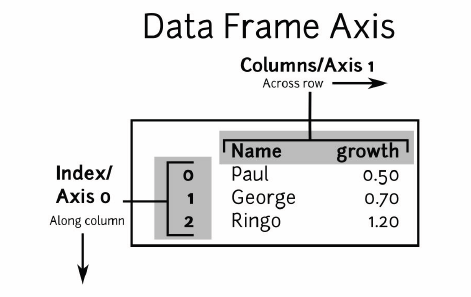

In [19]:
df.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object')]

In [22]:
# it is important to remember that 0 is the index and 1 is the columns 
df.axes[0]

RangeIndex(start=0, stop=10, step=1)

In [21]:
df.axes[1]

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

# Data Selection in DataFrame

In [3]:
# Data frame

df = pd.read_csv('Salary_Data.csv')


In [4]:
df

,Name,Salary,Education,Occupation
0,Alex,19159,PhD,Professor
1,Tom,10461,X,Business
2,Michel,19961,XII,Business
3,Hans,821,B.Com,Student
4,Biliana,13743,MBA,Private Sector


### The individual column (Series) of the DataFrame can be accessed via dictionary-style indexing of the column name.

In [6]:
# df['Name of column']
name = df['Salary']
name

0    19159
1    10461
2    19961
3      821
4    13743
Name: Salary, dtype: int64

In [8]:
type(name)

pandas.core.series.Series

### we can use attribute-style access

In [7]:
df.Name

0       Alex
1        Tom
2     Michel
3       Hans
4    Biliana
Name: Name, dtype: object

In [8]:
df.Salary

0    19159
1    10461
2    19961
3      821
4    13743
Name: Salary, dtype: int64

In [9]:
df.Education

0      PhD
1        X
2      XII
3    B.Com
4      MBA
Name: Education, dtype: object

# Note - 

Attribute-style access does not work for all cases.

For example, if the column names are not strings, or if the column names conflict with methods of the DataFrame

In [10]:
df1  = pd.read_csv('Salary_Data1.csv')

In [11]:
df1

,Name,Salary,Education,Occupation,rank
0,Alex,19159,PhD,Professor,1
1,Tom,10461,X,Business,3
2,Michel,19961,XII,Business,3
3,Hans,821,B.Com,Student,4
4,Biliana,13743,MBA,Private Sector,2


In [16]:
# rank is dataframe method
df1.rank

<bound method NDFrame.rank of       Name  Salary Education      Occupation  rank
0     Alex   19159       PhD       Professor     1
1      Tom   10461         X        Business     3
2   Michel   19961       XII        Business     3
3     Hans     821     B.Com         Student     4
4  Biliana   13743       MBA  Private Sector     2>

In [14]:
df1['rank']

0    1
1    3
2    3
3    4
4    2
Name: rank, dtype: int64

### We can also use above seleting style to add new column like ictionary-style

In [17]:
df1['Annual_Salary'] = df1['Salary']*12
df1

,Name,Salary,Education,Occupation,rank,Annual_Salary
0,Alex,19159,PhD,Professor,1,229908
1,Tom,10461,X,Business,3,125532
2,Michel,19961,XII,Business,3,239532
3,Hans,821,B.Com,Student,4,9852
4,Biliana,13743,MBA,Private Sector,2,164916


### Access dataframe as 2d-array

In [18]:
df1.values

array([['Alex', 19159, 'PhD', 'Professor', 1, 229908],
       ['Tom', 10461, 'X', 'Business', 3, 125532],
       ['Michel', 19961, 'XII', 'Business', 3, 239532],
       ['Hans', 821, 'B.Com', 'Student', 4, 9852],
       ['Biliana', 13743, 'MBA', 'Private Sector', 2, 164916]],
      dtype=object)

### we can transpose the full DataFrame to swap rows and columns

In [20]:
df1.T

,0,1,2,3,4
Name,Alex,Tom,Michel,Hans,Biliana
Salary,19159,10461,19961,821,13743
Education,PhD,X,XII,B.Com,MBA
Occupation,Professor,Business,Business,Student,Private Sector
rank,1,3,3,4,2
Annual_Salary,229908,125532,239532,9852,164916


# Pandas uses the .loc, .iloc also

In [15]:
df1.iloc[0:3]

,Name,Salary,Education,Occupation,rank
0,Alex,19159,PhD,Professor,1
1,Tom,10461,X,Business,3
2,Michel,19961,XII,Business,3


In [22]:
df1.iloc[:3,:2]

,Name,Salary
0,Alex,19159
1,Tom,10461
2,Michel,19961


In [23]:
df1.iloc[:,[0,2,4]]

,Name,Education,rank
0,Alex,PhD,1
1,Tom,X,3
2,Michel,XII,3
3,Hans,B.Com,4
4,Biliana,MBA,2


In [27]:
df1.loc[:2,:'Salary']

,Name,Salary
0,Alex,19159
1,Tom,10461
2,Michel,19961


### Selecting data using masking and fancy indexing

In [17]:
# Masking
df1[df1.Salary>11000]

,Name,Salary,Education,Occupation,rank
0,Alex,19159,PhD,Professor,1
2,Michel,19961,XII,Business,3
4,Biliana,13743,MBA,Private Sector,2


In [30]:
# masking and fancy indexing

df1.loc[df1.Salary>11000,['Name','rank']]

,Name,rank
0,Alex,1
2,Michel,3
4,Biliana,2


In [44]:
# Update rank of alex
df1.loc[df1.Name=='Alex','rank']=10

In [48]:
df1.loc[df1.Name=='Alex']

,Name,Salary,Education,Occupation,rank,Annual_Salary
0,Alex,19159,PhD,Professor,10,229908


# Handling Missing Data

* Many interesting datasets will have some amount of data missing. 
* Different data sources may indicate missing data in different ways.
* In this section we’ll discussed missing data in general as null, NaN, or NA values.

* NaN ==> acronym for Not a Number

* It is a special floating-point value recognized by all systems


#### NaN and None both have their place, and Pandas is built to handle the two of them.


In [50]:
# Pandas automatically type-casts when NA values are present.
v1 = pd.Series([1, np.nan, 2, None])
v1

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

# Working on Null Values

There are several useful methods for detecting, removing, and replacing null values in Pandas data structures

* #### isnull() => Generate a Boolean mask indicating missing values
* #### notnull() => Opposite of isnull()
* #### dropna()  => Return a filtered version of the data by droping
* #### fillna() => Return a copy of the data with missing values filled or imputed

# isnull()

In [18]:
data = pd.read_csv('Salary_Data_null.csv')
data

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,NaN
1,Tom,NaN,10461,X,Business,NaN
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,NaN
4,Biliana,28.0,13743,MBA,Private Sector,UK
5,Bob,NaN,20000,NaN,NaN,NaN
6,Joy,50.0,30000,B.Com,Private Sector,NaN


In [21]:
data.isnull()

,Name,Age,Salary,Education,Occupation,Address
0,False,False,False,False,False,True
1,False,True,False,False,False,True
2,False,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,False
5,False,True,False,True,True,True
6,False,False,False,False,False,True


In [82]:
data.isnull().sum()

Name          0
Age           2
Salary        0
Education     1
Occupation    1
Address       5
dtype: int64

# notnull()

In [83]:
data.notnull()

,Name,Age,Salary,Education,Occupation,Address
0,True,True,True,True,True,False
1,True,False,True,True,True,False
2,True,True,True,True,True,True
3,True,True,True,True,True,False
4,True,True,True,True,True,True
5,True,False,True,False,False,False
6,True,True,True,True,True,False


# dropna()

Note - We cannot drop single values from a DataFrame; we can only drop full rows or full columns.

In [20]:
# Drop by axis = 0 ( row)
# By default - dropna() will drop all rows in which any null value is present
data.dropna()

,Name,Age,Salary,Education,Occupation,Address
2,Michel,30.0,19961,XII,Business,USA
4,Biliana,28.0,13743,MBA,Private Sector,UK


In [22]:
# Drop by axis =1 (column)
# you can drop NA values along a different axis; axis=1 
# drops all columns containing a null value
data.dropna(axis=1)

,Name,Salary
0,Alex,19159
1,Tom,10461
2,Michel,19961
3,Hans,821
4,Biliana,13743
5,Bob,20000
6,Joy,30000


Note - But this drops some good data as well; you might rather be interested in dropping rows or columns with all NA values, or a majority of NA values

In [89]:
data.dropna(how='all')

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,NaN
1,Tom,NaN,10461,X,Business,NaN
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,NaN
4,Biliana,28.0,13743,MBA,Private Sector,UK
5,Bob,NaN,20000,NaN,NaN,NaN
6,Joy,50.0,30000,B.Com,Private Sector,NaN


In [24]:
data.drop(columns='Age')

,Name,Salary,Education,Occupation,Address
0,Alex,19159,PhD,Professor,NaN
1,Tom,10461,X,Business,NaN
2,Michel,19961,XII,Business,USA
3,Hans,821,B.Com,Student,NaN
4,Biliana,13743,MBA,Private Sector,UK
5,Bob,20000,NaN,NaN,NaN
6,Joy,30000,B.Com,Private Sector,NaN


In [93]:
data.dropna(thresh=3)

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,NaN
1,Tom,NaN,10461,X,Business,NaN
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,NaN
4,Biliana,28.0,13743,MBA,Private Sector,UK
6,Joy,50.0,30000,B.Com,Private Sector,NaN


# fillna()

Sometimes rather than dropping NA values, you’d rather replace them with a valid value.

In [25]:
data

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,NaN
1,Tom,NaN,10461,X,Business,NaN
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,NaN
4,Biliana,28.0,13743,MBA,Private Sector,UK
5,Bob,NaN,20000,NaN,NaN,NaN
6,Joy,50.0,30000,B.Com,Private Sector,NaN


In [26]:
# Fill with 0

data.fillna(0)

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,0
1,Tom,0.0,10461,X,Business,0
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,0
4,Biliana,28.0,13743,MBA,Private Sector,UK
5,Bob,0.0,20000,0,0,0
6,Joy,50.0,30000,B.Com,Private Sector,0


In [27]:
# forward-fill to propagate the previous value forward
data.fillna(method='ffill')

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,NaN
1,Tom,45.0,10461,X,Business,NaN
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,USA
4,Biliana,28.0,13743,MBA,Private Sector,UK
5,Bob,28.0,20000,MBA,Private Sector,UK
6,Joy,50.0,30000,B.Com,Private Sector,UK


# Note - 

Notice that if a previous value is not available during a forward fill, the NA value remains

In [100]:
# back-fill to propagate the next values backward

data.fillna(method='bfill')

,Name,Age,Salary,Education,Occupation,Address
0,Alex,45.0,19159,PhD,Professor,USA
1,Tom,30.0,10461,X,Business,USA
2,Michel,30.0,19961,XII,Business,USA
3,Hans,22.0,821,B.Com,Student,UK
4,Biliana,28.0,13743,MBA,Private Sector,UK
5,Bob,50.0,20000,B.Com,Private Sector,NaN
6,Joy,50.0,30000,B.Com,Private Sector,NaN
